In [17]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble  # import seperatley otherwise sub module won't be imported
import sklearn.neural_network # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans

import graphviz
import mpl_toolkits.mplot3d as plt3dd

In [95]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize = 0.7);
image_shape = people.images[0].shape;
mask = numpy.zeros(people.target.shape, dtype = bool);

for target in numpy.unique(people.target):
    mask[numpy.where(people.target == target)[0][:50]] = 1;

X_people = people.data[mask];
y_people = people.target[mask];

X_people /= 255;

In [83]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_people, y_people, stratify=y_people, random_state=0);

nmf = sklearn.decomposition.NMF(n_components=100, random_state=0, max_iter=1500);
pca = sklearn.decomposition.PCA(n_components=100, random_state=0);
kmeans = sklearn.cluster.KMeans(n_clusters=100, random_state=0, max_iter=1500);

X_train_nmf = nmf.fit_transform(X_train);
X_train_pca = pca.fit_transform(X_train);
X_train_km = kmeans.fit_transform(X_train);

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test));
X_reconstructed_kmean = kmeans.cluster_centers_[kmeans.predict(X_test)];
X_reconstructed_nmf = numpy.dot(nmf.transform(X_test), nmf.components_)

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1500 reached. Increase it to improve convergence.
  warnings.warn(


Axes : (5, 3)
Cluster means : (100, 5655)
PCA comp : (100, 5655)
NMF como : (100, 5655)


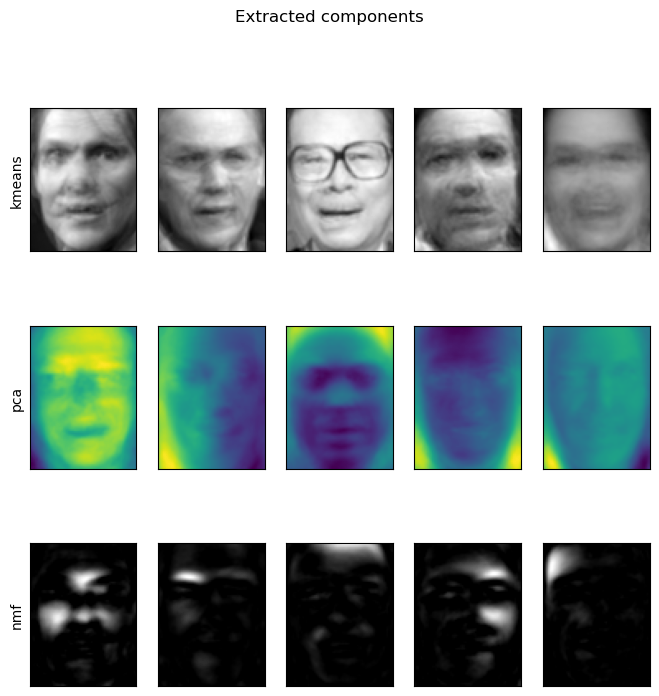

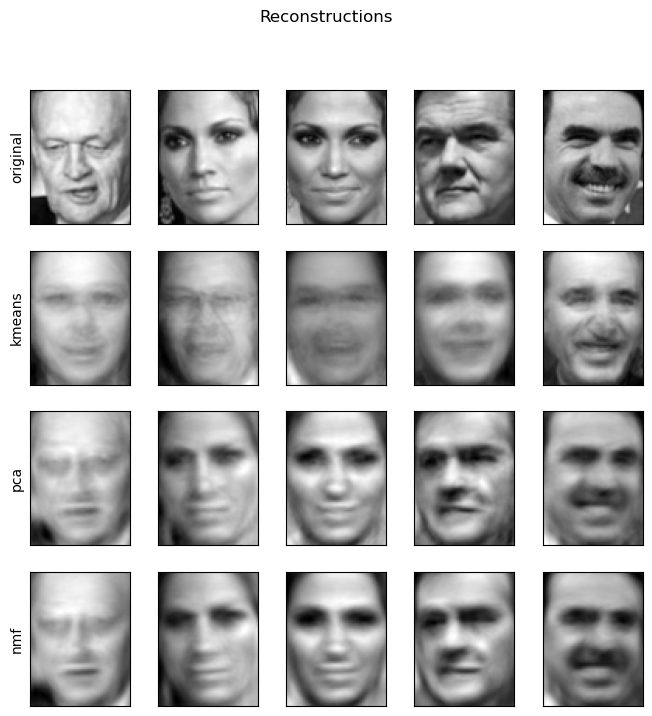

In [114]:

# Extracted components
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()});
fig.suptitle("Extracted components");

for (ax, comp_kmeans, comp_pca, comp_nmf) in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='grey');
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis');
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap = 'grey');

axes[0, 0].set_ylabel("kmeans");
axes[1, 0].set_ylabel("pca");
axes[2, 0].set_ylabel("nmf");


#
print("Axes : {}\nCluster means : {}\nPCA comp : {}\nNMF como : {}".format(
    axes.T.shape, kmeans.cluster_centers_.shape, pca.components_.shape, nmf.components_.shape
)); 





# Reconstructions
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()});
fig.suptitle("Reconstructions");

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmean, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape), cmap='grey');
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='grey');
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='grey');
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='grey');

axes[0, 0].set_ylabel("original");
axes[1, 0].set_ylabel("kmeans");
axes[2, 0].set_ylabel("pca");
axes[3, 0].set_ylabel("nmf");

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


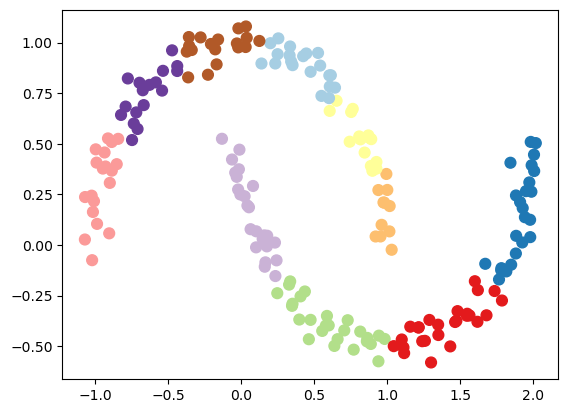

In [117]:

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.05, random_state=0, );
kmeans = sklearn.cluster.KMeans(n_clusters=10, random_state=0).fit(X);
y_pred = kmeans.predict(X);

plt.scatter(X[:,0],X[:,1], c=y_pred, s=60, cmap='Paired');